<a href="https://colab.research.google.com/github/martings/My_own_single_cell_toolkit/blob/main/Adipo_paper_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Check/Change the colab enviroment to R
#This part take 25 minites in install everything
# Enter commands in R (or R studio, if installed)
install.packages('Seurat')
install.packages("googledrive")
library(googledrive)
library(Seurat)
#drive_auth(path = NULL)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘dotCall64’, ‘gtools’, ‘caTools’, ‘plyr’, ‘tensor’, ‘BH’, ‘sitmo’, ‘sp’, ‘spam’, ‘globals’, ‘listenv’, ‘parallelly’, ‘zoo’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘RcppTOML’, ‘here’, ‘gplots’, ‘reshape2’, ‘gridExtra’, ‘RcppArmadillo’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘spatstat.data’, ‘spatstat.random’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘goftest’, ‘abind’, ‘deldir’, ‘polyclip’, ‘FNN’, ‘dqrng’, ‘SeuratObject’, ‘cowplot’, ‘fastDummies’, ‘fitdistrplus’, ‘future’, ‘future.apply’, ‘ggrepel’, ‘ggridges’, ‘ica’, ‘igraph’, ‘irlba’, ‘leiden’, ‘lmtest’, ‘matrixStats’, ‘miniUI’, ‘patchwork’, ‘pbapply’, ‘plotly’, ‘png’, ‘progressr’, ‘RANN’, ‘Rcpp’, ‘RcppAnnoy’, ‘RcppHNSW’, ‘reticulate’, ‘ROCR’, ‘RSpectra’, ‘Rtsne’, ‘scattermore’, ‘sctransform’, ‘shiny’, ‘spatstat.explore’, ‘spatstat.geom’, ‘uwot’, ‘RcppEigen’, ‘RcppProgress’


Installing package in

In [2]:
# Specify the URL of the file you want to download
#This step require google Auth
####Adipo Integration
file_id <- "1FotV5D8g_7txeUwNRpWsZiMtZWV3l3pI"
drive_download(as_id(file_id))

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: yes


Enter a number between 1 and 2, or enter 0 to exit.


Selection: 2


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=8401bb41026e466e42e8dc70ebd03d0b&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbk8tRi15OGY4N3AwbTdkaDhKeEdlVWJFb3d0WURmTzlHTTN2VENGck9ramh1bGRtVlJyVWZ6SkNiYTF5elBOZyIsInN0YXRlIjoiODQwMWJiNDEwMjZlNDY2ZTQyZThkYzcwZWJkMDNkMGIifQ==


File downloaded:

• Adipositos_Brown_Pre_White_Aregs_immature_full_anotado.rds
  <id: 1FotV5D8g_7txeUwNRpWsZiMtZWV3l3pI>

Saved locally as:

• Adipositos_Brown_Pre_White_Aregs_immature_full_anotado.rds



In [3]:
#Adipo integration (MMG)
Adipo<-readRDS("/content/Adipositos_Brown_Pre_White_Aregs_immature_full_anotado.rds")
#MMG<-readRDS("/content/Subset_Luminales_Alveolares_pbmc_seurat.rds")

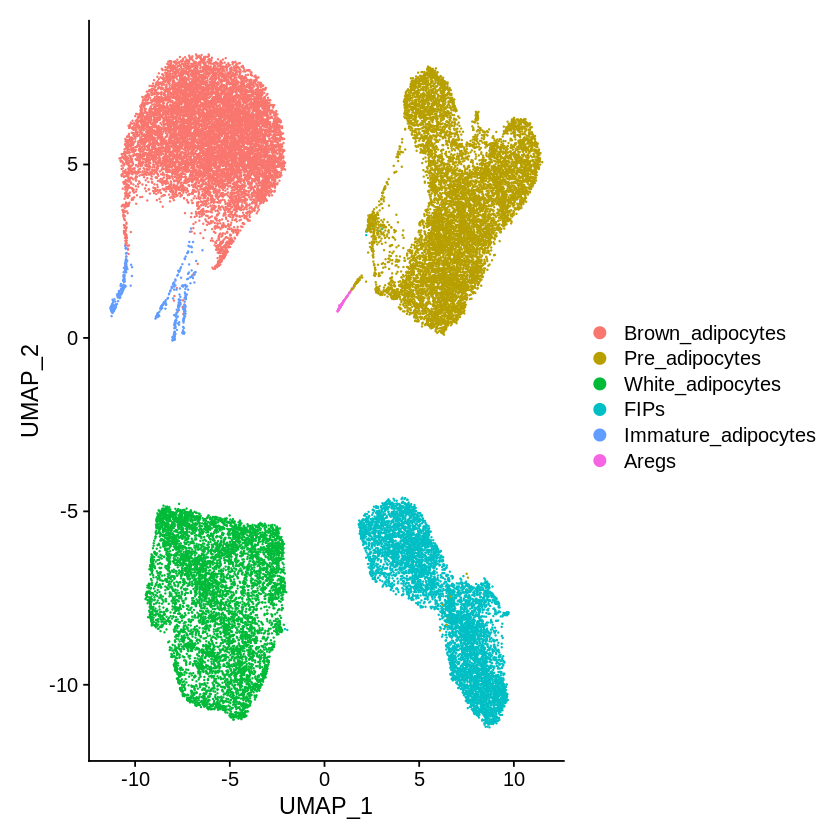

In [4]:
DimPlot(Adipo, reduction="umap")

In [5]:
library(tidyverse)
Adipo.markers <- FindAllMarkers(Adipo, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
head(Adipo.markers)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Calculating cluster Brown_adipocytes

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This mess

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CT010467.1,0,4.597528,0.881,0.061,0,Brown_adipocytes,CT010467.1
Gm20532,0,5.497488,0.842,0.028,0,Brown_adipocytes,Gm20532
Afg1l,0,5.498915,0.834,0.021,0,Brown_adipocytes,Afg1l
Kng2,0,5.286069,0.854,0.044,0,Brown_adipocytes,Kng2
Pald1,0,4.199112,0.879,0.076,0,Brown_adipocytes,Pald1
Babam2,0,4.427532,0.866,0.070,0,Brown_adipocytes,Babam2


ERROR: ignored

In [6]:
top5_x_clus<-Adipo.markers %>%
  group_by(cluster) %>%
  slice_max(n = 5, order_by = avg_log2FC)
top5_x_clus
#Release memory
gc()

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0,6.594138,0.521,0.006,0,Brown_adipocytes,Cabcoco1
0,6.394338,0.289,0.004,0,Brown_adipocytes,Grip1
0,6.261767,0.257,0.003,0,Brown_adipocytes,AC154682.1
0,6.167431,0.484,0.008,0,Brown_adipocytes,Stpg2
0,6.127455,0.507,0.008,0,Brown_adipocytes,Gm12353
0,10.258458,0.509,0.001,0,Pre_adipocytes,Igf2
0,8.549898,0.680,0.012,0,Pre_adipocytes,Dlk1
0,6.787134,0.671,0.036,0,Pre_adipocytes,Mfap4
0,5.905181,0.760,0.157,0,Pre_adipocytes,H19


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3837063,205.0,6701924,358.0,6701924,358
Vcells,706225676,5388.1,1303642763,9946.1,1303642077,9946


In [8]:
for ( i in levels(top5_x_clus$cluster)) {
  nombre<-paste0("Cluster_",i)
  genes<-subset(top5_x_clus, subset = cluster%in%i)[,7]
  plot1<-FeaturePlot(Adipo, reduction = "umap",features = genes$gene,  min.cutoff = "q10", max.cutoff = "q90" )
  plot1 + labs(title = nombre)
  plot1
  ggsave(paste0(nombre,"_umap_cluster_cell_type.pdf"), plot = plot1,height = 8.27 ,width = 8.27)

}


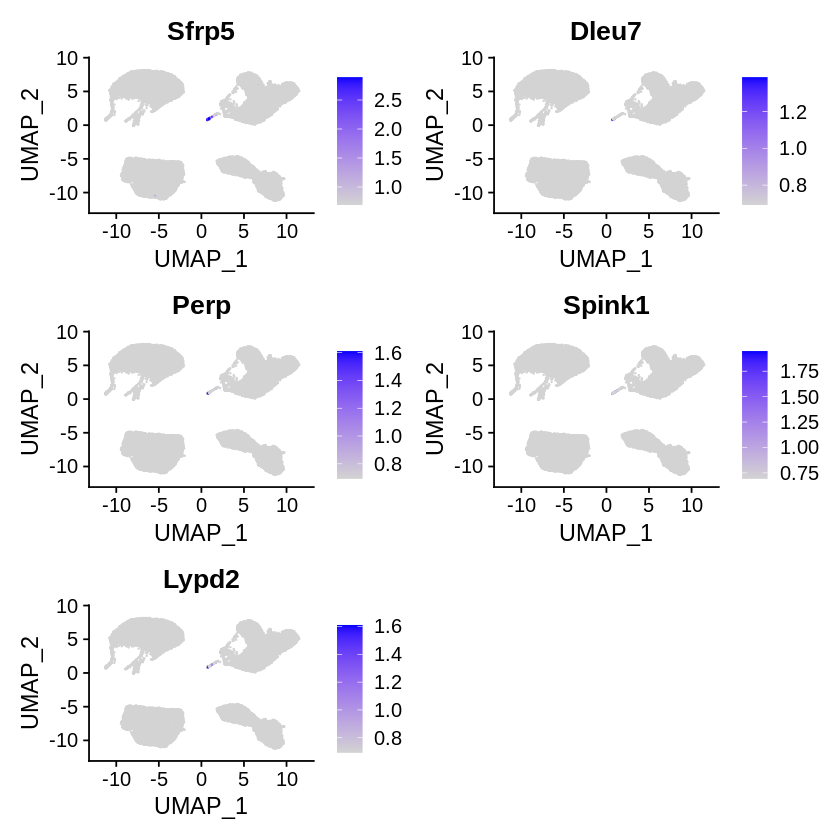

In [9]:
plot1

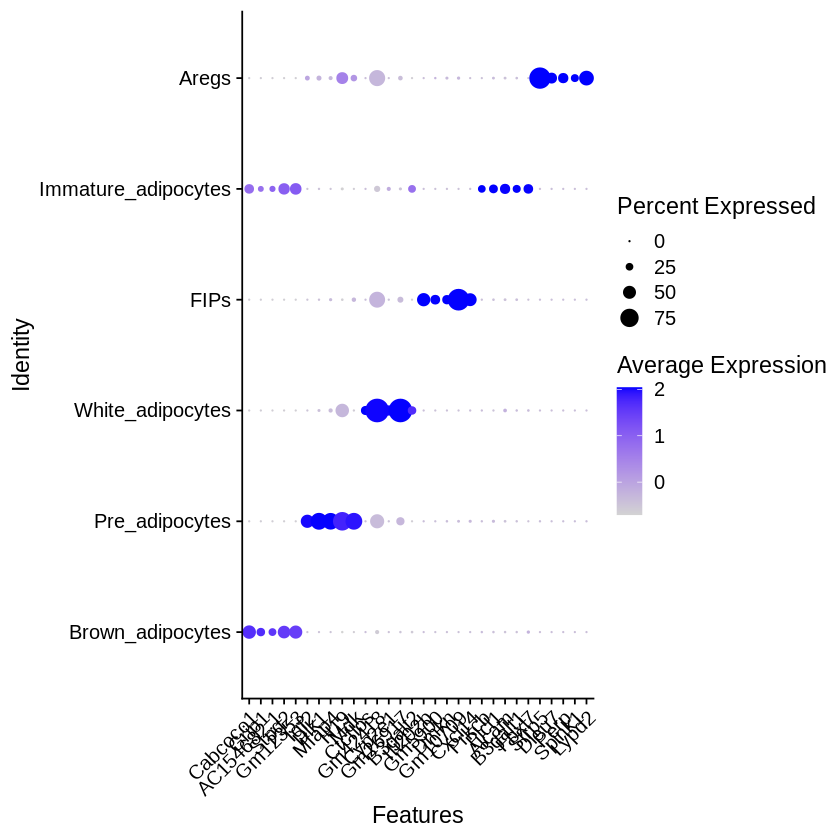

In [11]:
DotPlot(Adipo, features = top5_x_clus$gene)+ RotatedAxis()
#Al pedo, no se ve
#VlnPlot(pbmc, features = top5_x_clus$gene)+ RotatedAxis()

for ( i in levels(top5_x_clus$cluster)) {
  nombre<-paste0("Cluster_",i)
  genes<-subset(top5_x_clus, subset = cluster%in%i)[,7]
  plot1<-VlnPlot(Adipo, features = genes$gene)
  plot1 + labs(title = nombre)
  plot1
  ggsave(paste0("VlnPlot_",nombre,"_cluster_top5_umap.png"), plot = plot1,height = 8.27 ,width =  11.69)
}


Warning message in DoHeatmap(Adipo, features = top5_x_clus$gene):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Gm5900, AC154682.1, Grip1”


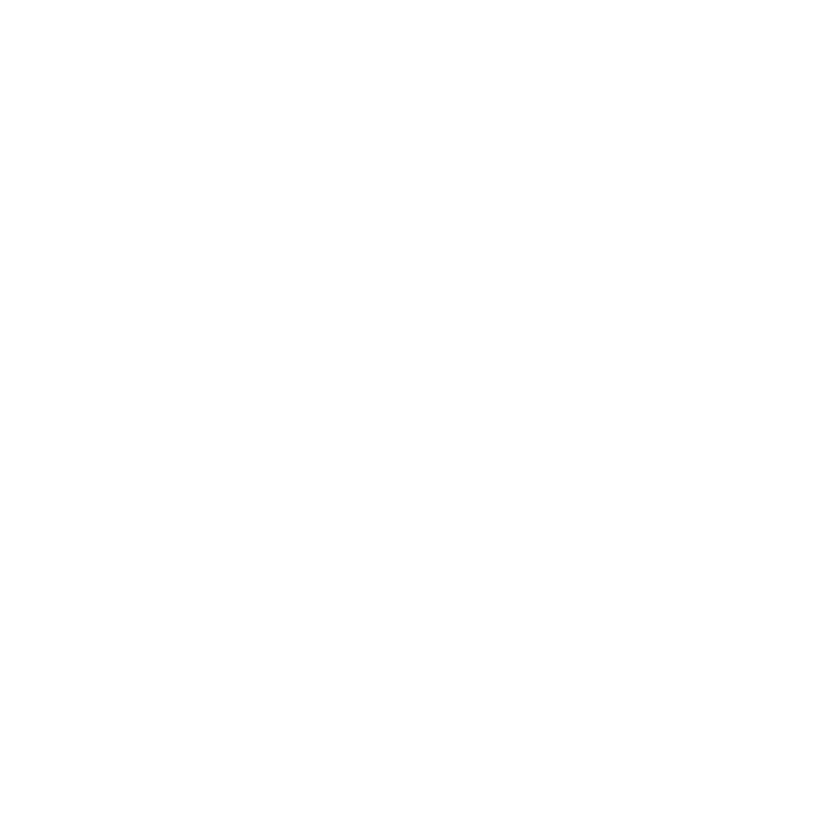

In [13]:
DoHeatmap(Adipo, features = top5_x_clus$gene)

In [ ]:
# Save old identity classes (the cluster labels) for reference.
pbmc[["clustering"]] <- Idents(object = Adipo)

# Rename classes.
pbmc <- RenameIdents(object = Adipo, `0` = "Brown_adipocytes", `1` = "Pre_adipocytes", `2` = "White_adipocytes",
                     `3` = "FIPs",`4` = "Immature_adipocytes",`5` = "Aregs")
DimPlot(pbmc, reduction="umap", label = T)